In [2]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy


Vizualization of Ginibre eigenvalues and Saturn effect


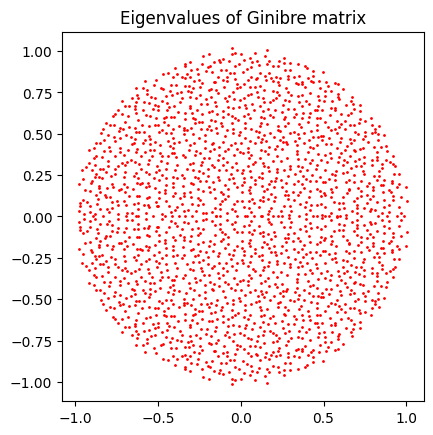

In [15]:
print("Vizualization of Ginibre eigenvalues and Saturn effect")
gen = rd.default_rng()
N = 2000
mu = 0.0
sigma = 1.0/np.sqrt(1*N)

def obtainGinibreEig(N,mu,sigma):
    mat = gen.normal(mu,sigma, (N,N)) #+gen.normal(mu,sigma,(N,N))*complex(0,1)
    #print(mat)

    eigenvalues, _= np.linalg.eig(mat)
    #print(eigenvalues)


    #plt.xlim(-1.0,1.0)
    #plt.ylim(-1.0,1.0)
    return eigenvalues

eigenvalues = []
eigenvalues.append(obtainGinibreEig(N,mu,sigma))
    
#print(eigenvalues)
values = np.append([], eigenvalues)
'''print(values)
print(values.real)
print(values.imag)
'''
plt.gca().set_aspect('equal')
plt.scatter(values.real, values.imag, s = 1,c="red")
plt.title("Eigenvalues of Ginibre matrix")
plt.show()

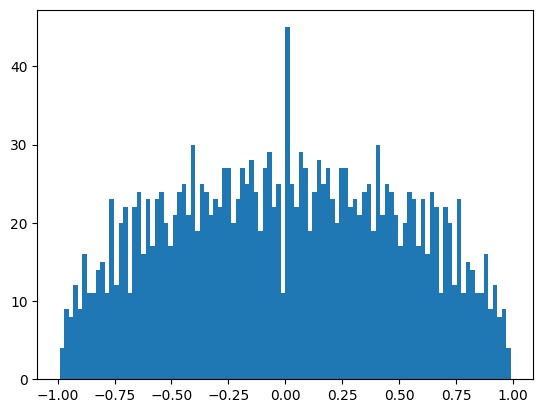

In [7]:
plt.hist(values.imag, 100);

Vizualization of Ginibre eigenvalues and Saturn effect


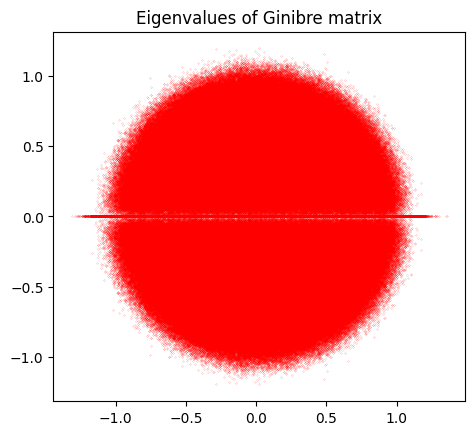

In [16]:
print("Vizualization of Ginibre eigenvalues and Saturn effect")
gen = rd.default_rng()
N = 64
mu = 0.0
sigma = 1.0/np.sqrt(1*N)

def obtainGinibreEig(N,mu,sigma):
    mat = gen.normal(mu,sigma, (N,N)) #+gen.normal(mu,sigma,(N,N))*complex(0,1)
    #print(mat)

    eigenvalues, _= np.linalg.eig(mat)
    #print(eigenvalues)


    #plt.xlim(-1.2,1.2)
    #plt.ylim(-1.2,1.2)
    return eigenvalues

eigenvalues = []
for _ in range(10000):
    M = obtainGinibreEig(N,mu,sigma)
    eigenvalues.append(M)
    
#print(eigenvalues)
values = np.append([], eigenvalues)
'''print(values)
print(values.real)
print(values.imag)
'''
plt.gca().set_aspect('equal')
plt.scatter(values.real, values.imag, s = 0.01,c="red")
plt.title("Eigenvalues of Ginibre matrix")
plt.show()

In [13]:
"""values2 = []
for vp in values.imag:
    if vp > 0:
        values2.append(vp)
print(values2)"""

values2 = values[values.imag>0].imag


[0.33154271284127895, 0.9740161778540444, 0.1123031850782919, 0.5880691706216418, 0.6827111461523729, 0.3554043410730369, 0.7123059495492172, 0.8463310434068605, 0.6487067050366985, 0.8076428163636282, 0.794868512202985, 0.06861960203609975, 0.7086011039619865, 0.615154383329621, 0.47605511268400647, 0.2611134961761643, 0.352191279504243, 0.5011496399292683, 0.5602954206581617, 0.33830638883703945, 0.4824530326449265, 0.278717279519098, 0.3185730126245372, 0.35142881349648436, 0.1459142205997541, 0.10233917450549783, 0.22007553816876646, 0.15515908258872727, 1.0549656704965458, 0.6769182963610026, 0.9878825342201731, 0.7690989516619798, 0.8844003072190887, 0.09720168992261412, 0.0030147873905094135, 0.7328365937080894, 0.3210325324216233, 0.8028966657684149, 0.5048758204893402, 0.23384460734691961, 0.4950497043925891, 0.2007641978765921, 0.25561120250386504, 0.7698338480028799, 0.2468416903364373, 0.4374524559997283, 0.5257029295776872, 0.6180237646429516, 0.43774740401962264, 0.507428

(array([1.976e+03, 4.742e+03, 6.135e+03, 7.203e+03, 7.663e+03, 8.147e+03,
        8.438e+03, 8.562e+03, 8.721e+03, 8.887e+03, 8.923e+03, 8.823e+03,
        8.909e+03, 8.814e+03, 8.603e+03, 8.608e+03, 8.755e+03, 8.559e+03,
        8.451e+03, 8.387e+03, 8.313e+03, 8.233e+03, 7.974e+03, 7.668e+03,
        7.760e+03, 7.478e+03, 7.357e+03, 7.159e+03, 6.891e+03, 6.645e+03,
        6.506e+03, 6.067e+03, 5.965e+03, 5.621e+03, 5.215e+03, 4.718e+03,
        4.323e+03, 3.823e+03, 3.197e+03, 2.518e+03, 1.940e+03, 1.367e+03,
        8.760e+02, 4.800e+02, 2.450e+02, 1.260e+02, 4.700e+01, 1.900e+01,
        6.000e+00, 3.000e+00]),
 array([3.34556208e-04, 2.42777516e-02, 4.82209470e-02, 7.21641424e-02,
        9.61073377e-02, 1.20050533e-01, 1.43993728e-01, 1.67936924e-01,
        1.91880119e-01, 2.15823315e-01, 2.39766510e-01, 2.63709705e-01,
        2.87652901e-01, 3.11596096e-01, 3.35539292e-01, 3.59482487e-01,
        3.83425682e-01, 4.07368878e-01, 4.31312073e-01, 4.55255268e-01,
        4.791984

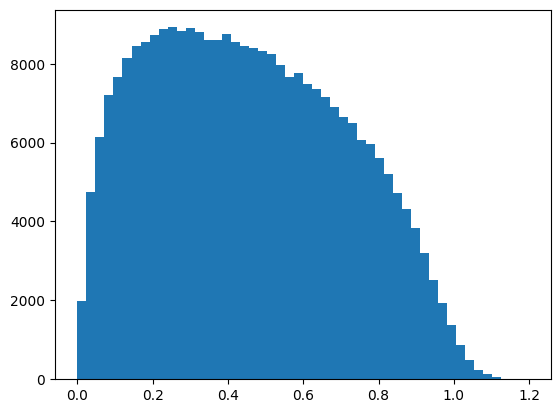

In [14]:
plt.hist(values2, 50);
# essayer de comparer avec une loi gamma ou de Rayleigh

#### Does this distribution converge to a half gaussian ? and at what speed if it does ?

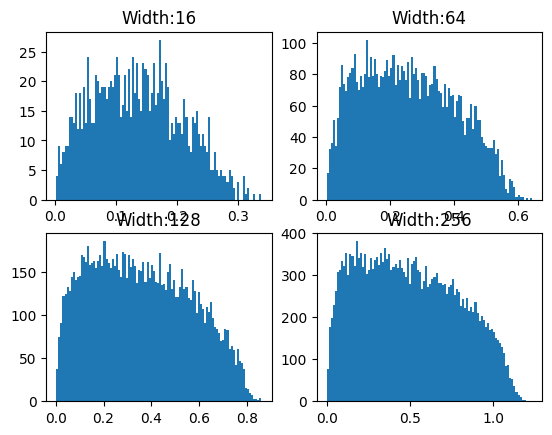

In [32]:
#W = 64
#N = 100
def ginOE_eigen(W,N):
    mu = 0.0
    sigma = 1.0/np.sqrt(1*N)
    eigenvalues=[]
    for _ in range(N):
        M = obtainGinibreEig(W,mu,sigma)
        eigenvalues.append(M)
    values = np.append([], eigenvalues)
    return values
    
fig, axs = plt.subplots(2, 2)
params = [(16,200),(64,200),(128,200),(256,200)]
for i in range(2):
    for j in range(2):
        W,N = params[i*2+j]
        eig = ginOE_eigen(W,N)
        values = eig[eig.imag>0].imag
        axs[i,j].hist(values, 100); #TODO: "normalize" so that we can compare correctly
        axs[i,j].set_title("Width:"+str(W))

In [7]:
def f(t, y):
    σ = y[0]
    dσ = y[1]
    dy0 = dσ
    dy1 = -2/t * np.sqrt(max((σ-t*dσ)*(t*dσ - σ + (dσ)**2), 0))
    dy2 = σ/t
    return np.array([dy0, dy1, dy2])

t0 = 1e-15
tf = 9


In [8]:
y0_0 = -t0/np.pi-(t0/np.pi)**2
y0_1 = -1/np.pi-2*t0/np.pi
y0_2 = -t0/np.pi-t0**2/(2*np.pi**2)
y0 = np.array([y0_0, y0_1, y0_2])


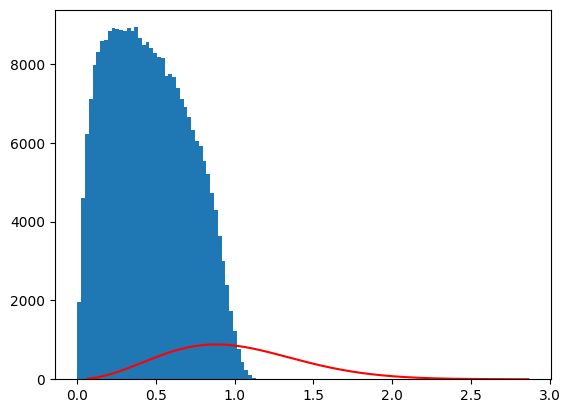

In [9]:
sol = solve_ivp(f, (t0, tf) ,y0, max_step=.001)
σ = sol.y[0][100:]
dσ = sol.y[1][100:]
I = sol.y[2][100:]
t = sol.t[100:]
x = t/np.pi

E = np.exp(I)
p = E/x**2 * (σ**2 + x*np.pi*dσ - σ)

plt.hist(values2, 50)
plt.plot(x[100:], 950*p[100:], color = 'red')


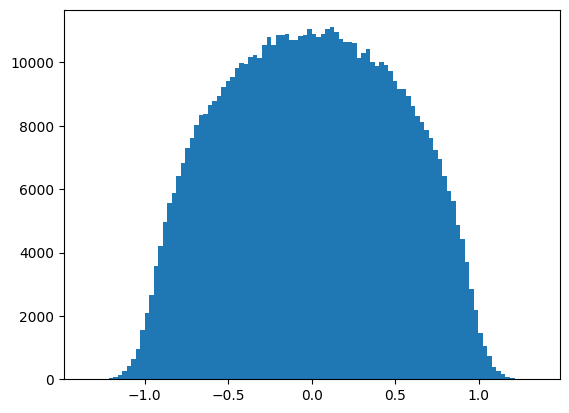

In [10]:
plt.hist(values.real, 100)
ecart = np.max(values.real) - np.min(values.real)
#essayer de comparer avec une gaussienne ou une loi de wigner

In [11]:
### Histogramme des données
bins = 100
y, x = np.histogram(values.real, bins = bins)
# Milieu de chaque classe
x = (x + np.roll(x, -1))[:-1] / 2.0


int = 0
for i in range(bins):
    int += y[i]*ecart/bins

In [12]:
dist_name = "norm"

# Paramètres de la loi
dist = getattr(scipy.stats, dist_name)

# Modéliser la loi
param = dist.fit(values.real)
print(param)

(0.0001953007543028557, 0.5084519012305504)


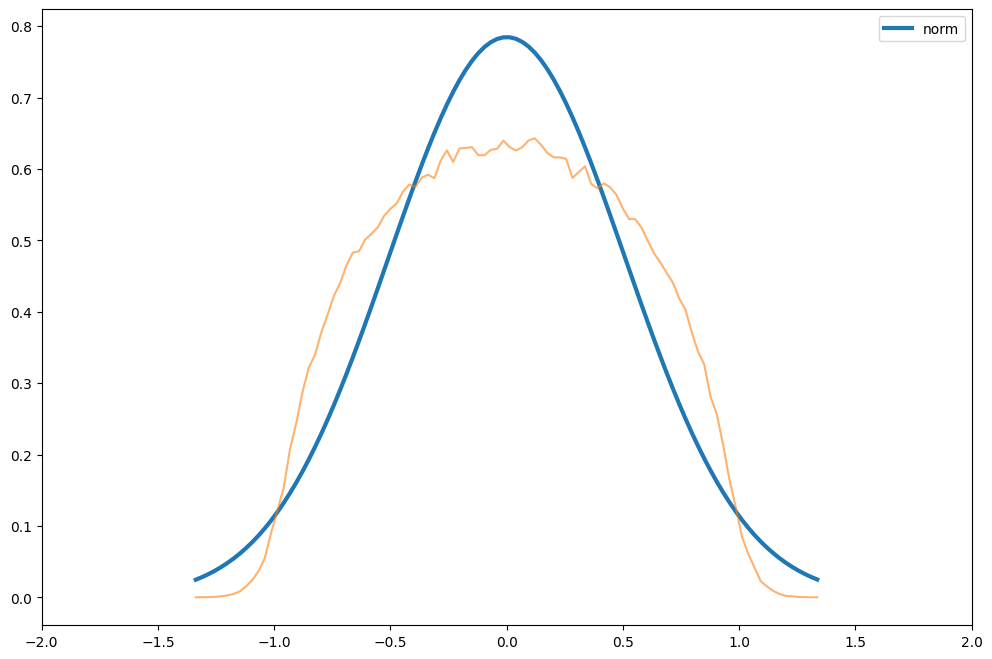

In [13]:
loc = param[-2]
scale = param[-1]
arg = param[:-2]

pdf = dist.pdf(x, loc=loc, scale=scale, *arg)

plt.figure(figsize=(12,8))
plt.plot(x, pdf, label=dist_name, linewidth=3) 
plt.plot(x, y/int, alpha=0.6)
plt.xlim(-2,2)
plt.legend()
plt.show()

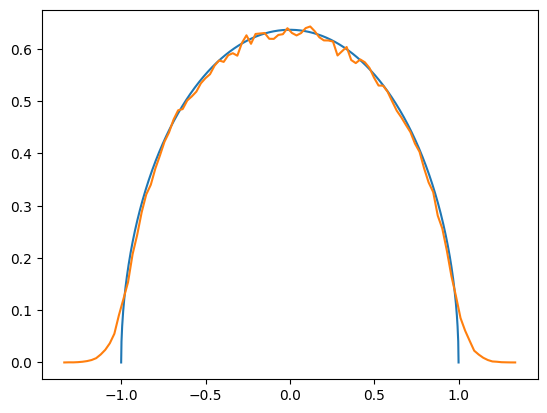

In [14]:
#demicercle ok sauf sur les bords, à comparer avec les GinUE
R = 1
def wigner(x):
    if np.abs(x) < R:
        return np.sqrt(R**2 - x**2)/(2*np.pi*R**2)
    else: return(0)

X = np.linspace(-1,1,1000)
Y = [wigner(x)*4 for x in X]
plt.plot(X,Y)
plt.plot(x,y/int)

Vizualization of Ginibre eigenvalues and Saturn effect
[array([ 1.24903936-0.75962444j, -1.4960465 -0.29516869j,
       -0.30323672+1.44393343j,  1.29424591+0.55998343j,
        1.31341031+0.26885427j, -0.06142245-1.42569549j,
       -0.75399644+1.14698605j,  0.99367034+0.82788376j,
        0.41562424+1.21786891j,  1.20562906-0.42017858j,
        1.19845214-0.23552956j,  0.36916622-1.25816324j,
        0.74073071-1.01053673j, -0.20764839-1.24848967j,
       -1.17051905-0.69954919j, -0.61083809-1.09453884j,
       -1.0398775 +0.77064231j, -0.88573252-0.91388107j,
       -1.08289587+0.60871292j, -1.09429038-0.53717029j,
       -1.13248527+0.34570344j, -0.41098939+1.07759295j,
       -0.13410868+1.12787803j,  0.99397553+0.50544589j,
        0.68770877+0.80878536j,  0.38563539+0.96796847j,
        0.05960326+1.02378683j, -0.69707902+0.73982909j,
       -0.85732697-0.72254812j, -1.09820221+0.06451041j,
       -0.31003055-0.98002181j,  0.54508419-0.90302429j,
        0.86855439+0.36140325j, 

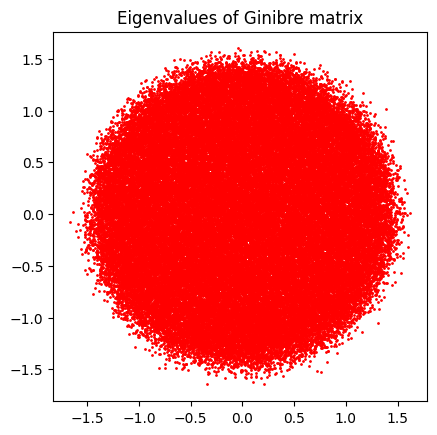

In [15]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

print("Vizualization of Ginibre eigenvalues and Saturn effect")
gen = rd.default_rng()
N = 64
mu = 0.0
sigma = 1.0/np.sqrt(1*N)

def obtainGinibreEig(N,mu,sigma):
    mat = gen.normal(mu,sigma, (N,N)) +gen.normal(mu,sigma,(N,N))*complex(0,1)
    #print(mat)

    eigenvalues, _= np.linalg.eig(mat)
    #print(eigenvalues)


    #plt.xlim(-1.0,1.0)
    #plt.ylim(-1.0,1.0)
    return eigenvalues

eigenvalues = []
for _ in range(1000):
    eigenvalues.append(obtainGinibreEig(N,mu,sigma))
    
print(eigenvalues)
values2 = np.append([], eigenvalues)
print(values2)

plt.gca().set_aspect('equal')
plt.scatter(values2.real, values2.imag, s = 1,c="red")
plt.title("Eigenvalues of Ginibre matrix")
plt.show()


In [16]:
bins = 100
y, x = np.histogram(values2.real, bins = bins)

ecart = np.max(values2.real) - np.min(values2.real)
int = 0
for i in range(bins):
    int += y[i]*ecart/bins